In [1]:
%load_ext autoreload
%autoreload 2
from mt.scan import Scan
from mt.ct_utils import SegmentationSettings

In [2]:
path = "../../04_uCT/BA09/"
scan = Scan(path)
scan.load(logging=True)

Loading images from:  ../../04_uCT/BA09/Slices/
Loaded stack with shape (1783, 897, 2423) and a size of 7.75 GB in 10.20 s.
No _mask file found at: ../../04_uCT/BA09/_mask.npy
No _particle_mask file found at: ../../04_uCT/BA09/_particle_mask.npy
No _tesselation file found at: ../../04_uCT/BA09/_tesselation.npy


In [3]:
particle_settings = SegmentationSettings(particle_mask_sigma=0.8,
                                         particle_n_erosions=7,
                                         particle_enlarge_radius=1)
general_settings = SegmentationSettings(air_mask_sigma=0.6,
                                        air_n_erosions=2,
                                        contrast_min_percentile=0,
                                        contrast_max_percentile=9,
                                        particle_mask_sigma=0.2,
                                        particle_n_erosions=2,
                                        particle_enlarge_radius=1,
                                        smooth_labels_radius=2)
scan.set_particle_segmentation_settings(particle_settings)
scan.set_segmentation_settings(general_settings)

In [5]:
scan.segment()
scan.segment_particles()
scan.voronoi_tesselation()

RuntimeError: Error: Fail to write buffer memory. OpenCL error : CL_OUT_OF_RESOURCES (-5).

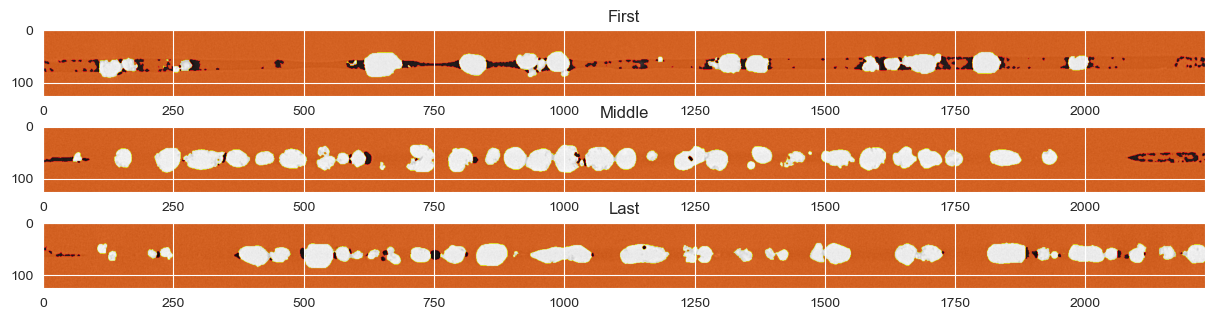

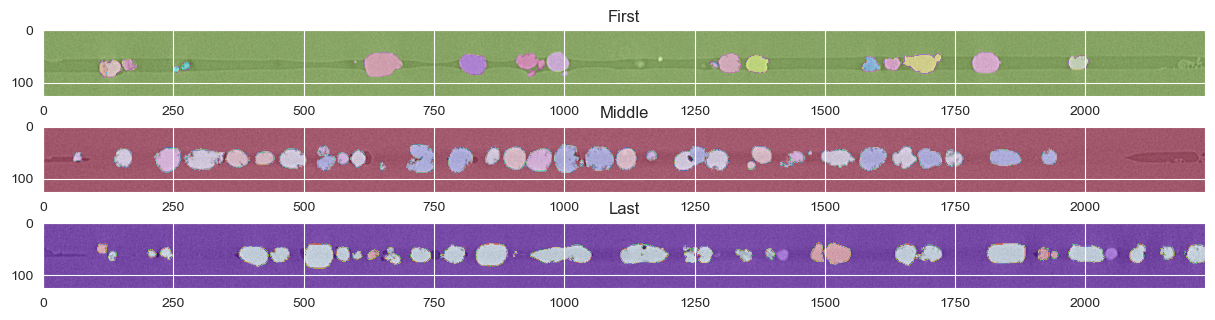

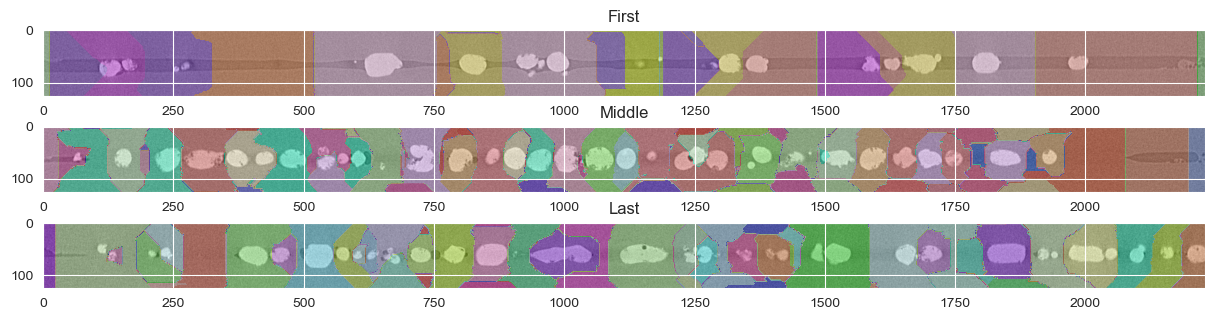

In [23]:
scan.show_nb("mask", alpha=0.7)
scan.show_nb("particle_mask", alpha=0.4)
scan.show_nb("tesselation", alpha=0.4)

In [9]:
from mt.utils import print_image_info
print_image_info(scan.get_mask())

	 Shape: (1621, 126, 2231)
	 Range: 1-3
	 Dtype: uint8
	 Unique: 3
